## 七月在线机器学习实训营三期第八周(深度学习)考试
#### 考试说明:
- 起止时间：请同学在2018年3月30日至4月1日期间完成，最晚提交时间本周日（4月1日24时之前）结束，<b>逾期不接受补考,该考试分数计入平时成绩</b>
- 考试方式：请同学<font color=red><b>拷贝</b></font>该试卷至自己姓名的目录后，将文件更名为同学姓名拼音-exam8后，进行作答。例如wangwei-exam8
- 提交格式：请同学新建自己姓名全拼的文件夹，将该试卷，数据文件，zip文件等相关考试文件，放置此目录下。将该目录<b>移动</b>至/0.Teacher/Exam/8/目录下
- 注意事项：为确保同学们真正了解自身对本周课程的掌握程度，<font color=red><b>请勿翻阅，移动，更改</b></font>其它同学试卷。如发现按0分处理
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分不用填写

- 同学姓名:<u>__赵星辰___</u>  
- 批改人： David
- 最终得分:90

<center><h1>####答卷开始####</h1></center>
<hr>

## 一、简答题(共10题，1-8题每题5分，最后两题每题10分。共计60分)

- note:能看出来 基本都是自己理解写来的答案。。虽然精简，但都是自己理解下来的，下一步继续丰富和补充。
- note: 55

#### 1.试写您对深度学习的理解，以及它与传统机器学习的关系，相同与不同之处。

- 深度学习:

输入——基础特征提取——多层复杂特征提取——权重学习——预测结果;

- 关系:

是机器学习的一个分支,都包含输入,特征提取,调参以及输出等步骤

- 不同;

1.深度学习的特征提取是计算机进行的黑盒操作,人类并不能完全解释其背后的物理意义或实际含义

2.深度学习需要大量数据和大量计算资源

#### 2.简要介绍下您了解的keras框架? 以及进行一个任务的基本流程

Keras的核心数据结构是“模型”，是一种组织网络层的方式。

Keras中主要的模型是Sequential模型，Sequential是一系列网络层按顺序构成的栈。

In [ ]:
from keras.models import Sequential

model = Sequential()

In [ ]:
# 将一些网络层通过.add()堆叠起来，就构成了一个模型：

from keras.layers import Dense, Activation

model.add(Dense(units=64, input_dim=100))
model.add(Activation("relu"))
model.add(Dense(units=10))
model.add(Activation("softmax"))

In [ ]:
# 完成模型的搭建后，使用.compile()方法来编译模型：

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# 完成模型编译后，在训练数据上按batch进行一定次数的迭代来训练网络
model.fit(x_train, y_train, epochs=5, batch_size=32)

In [ ]:
# 使用模型，对新的数据进行预测：

classes = model.predict(x_test, batch_size=128)

#### 3.工业界在训练深度学习模型时，采用训练方式多为SGD（mini-batch），请简述这种方式较其它方式的优点？
- note:优点不光是平衡。。还有。

mini-batch,每次迭代只用到部分训练集样本

SGD 是mini-batch的特殊情况,每个mini-batch只有一个训练集样本

mini-batch 在计算资源和计算效率之间做到一定的平衡

#### 4.  请简述神经风格中的BP模型的信号正向传播与误差反向传播的过程？

输入样本,前向传播应用模型并输出结果

误差的反向传播用来逐层更新权值

#### 5.  在什么情况下，会使用到早停法earyly stoping? 使用早停法可以防止什么情况发生？

- 一边训练,一边盯着验证集的准确率.

- 在每一轮结束时（一个Epoch集为对所有的训练数据的一轮遍历）计算验证集(validation data)的准确率accuracy，当准确率accuracy不再提高时，就停止训练。

- 可以防止过拟合发生

#### 6.  训练多层神经网络时可以采用哪些方式防止过拟合？

- dropout

- early stopping

- 数据扩增

- 正则化


#### 7.  进行深度学习任务时，使用激活函数是为了解决什么问题？ 常用的激活函数有哪些？

- note:是为了解决线性问题吧？

解决非线性问题

- 常用:

1. sigmoid
2. tanh
3. ReLU


#### 8 . 请简要说明CNN网络的框架结构

INPUT → [[CONV → RELU] ∗ N → POOL?] ∗ M → [Full Connect → RELU] ∗ K → Full Connect

N,M,K均表示重复次数

#### 9.请简述应当从哪些方向上思考和解决深度学习中出现的的over fitting问题？

dropout

early stopping

数据扩增:增加训练集的数据

正则化:降维

#### 10. 谈谈您对深度学习中的自适应学习率的了解

1. 太大的学习速率导致学习的不稳定，太小值又导致极长的训练时间。

2. 自适应学习速率通过保证稳定训练的前提下，达到了合理的高速率，可以减少训练时间。

3. 学习率先大后小有助于尽快完成训练

## 二、实验题(共1题，共计40分)

- note: 35分。。 纯代码了。应该有每个流程的说明

### 1. 请使用keras框架，构建CNN网络完成对MNIST数据集的训练，评估及预测

In [1]:
import numpy as np
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Load the datasets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
from keras import backend as K

In [4]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

In [5]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Put everything on grayscale
X_train /= 255
X_test /= 255

In [6]:
# convert class vectors to binary class matrices
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test = np_utils.to_categorical(Y_test, nb_classes)

In [7]:
X_train[0].shape

(28, 28, 1)

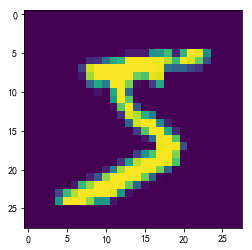

In [8]:
plt.imshow(X_train[0].reshape(28, 28))

In [9]:
print(np.asarray(range(10)))
print(Y_train[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 1 0 0 0 0]


In [10]:
# -- Initializing the values for the convolution neural network

nb_epoch = 10  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# Vanilla SGD
sgd = SGD(lr=10, decay=1e-6, momentum=0.9, nesterov=True)

In [11]:
# 搭模型
model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                 padding='valid', input_shape=shape_ord))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [12]:
# 编译
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [13]:
network_history = model.fit(X_train, Y_train, batch_size=batch_size, 
          epochs=nb_epoch,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 50s - loss: 0.8202 - acc: 0.7351 - val_loss: 0.2668 - val_acc: 0.9229
Epoch 2/10
60000/60000 [==============================] - 49s - loss: 0.3978 - acc: 0.8799 - val_loss: 0.2074 - val_acc: 0.9403
Epoch 3/10
60000/60000 [==============================] - 45s - loss: 0.3316 - acc: 0.8999 - val_loss: 0.1692 - val_acc: 0.9514
Epoch 4/10
60000/60000 [==============================] - 48s - loss: 0.2990 - acc: 0.9090 - val_loss: 0.1508 - val_acc: 0.9556
Epoch 5/10
60000/60000 [==============================] - 44s - loss: 0.2652 - acc: 0.9202 - val_loss: 0.1413 - val_acc: 0.9564
Epoch 6/10
60000/60000 [==============================] - 43s - loss: 0.2475 - acc: 0.9253 - val_loss: 0.1234 - val_acc: 0.9627
Epoch 7/10
60000/60000 [==============================] - 45s - loss: 0.2270 - acc: 0.9326 - val_loss: 0.1129 - val_acc: 0.9659
Epoch 8/10
60000/60000 [==============================

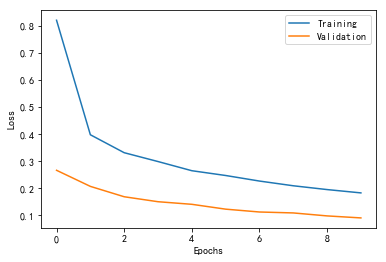

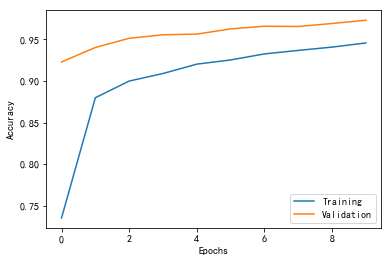

In [14]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

In [15]:
#Evaluating the model on the test data    
score, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', accuracy)

Test score: 0.09107940580081195
Test accuracy: 0.9731


### 本阶段课程意见反馈题(非必答，不送分)
#### 请同学围绕以下两点进行回答：
- 自身总结：请您对您自己在本周课程的学习，收获，技能掌握等方面进行一次总结 ，也包括有哪些方面存在哪些不足，欠缺，困惑。作为将来回顾学习路径时的依据。


CNN真的很慢,虽然参数少

需要仔细琢磨整个过程以及参数影响的原因

- 课程反馈：请就知识点，进度，难易度，教学方式，考试方式及难易度等方面向我们反馈，督促我们进行更有效的改进。

<hr>
<center><h1>####答卷结束####</h1></center>